Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

Load DataSets

In [2]:
df= pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#delete a column
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#to get info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# to display number of samples on each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
#check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Exploratory Data Analysis

<Axes: >

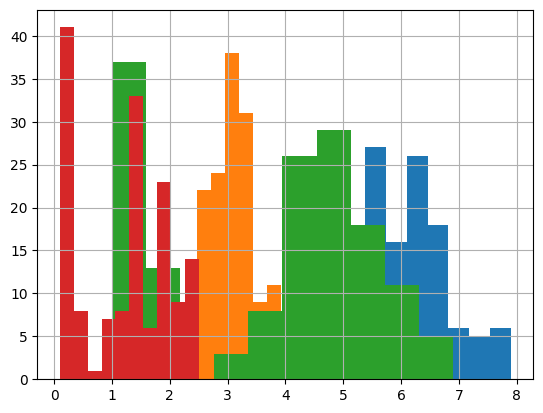

In [8]:
#histograms
df['SepalLengthCm'].hist()
df['SepalWidthCm'].hist()
df['PetalLengthCm'].hist()
df['PetalWidthCm'].hist()

In [9]:
#scatterplot
colors=['red','orange','blue']
Species=['Iris-setosa','Iris-versicolor','Iris-virginica']

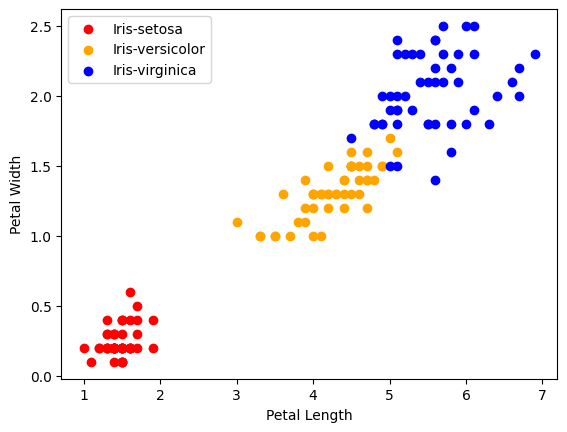

In [10]:
for i in range(3):
    x=df[df['Species']==Species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c=colors[i],label=Species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

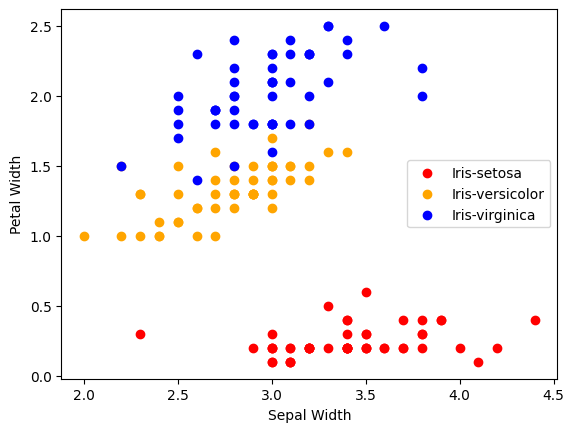

In [11]:
for i in range(3):
    x=df[df['Species']==Species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c=colors[i],label=Species[i])
plt.ylabel('Petal Width')
plt.xlabel('Sepal Width')
plt.legend()

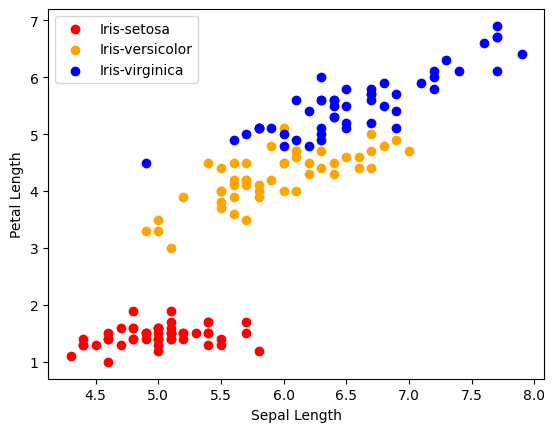

In [12]:
for i in range(3):
    x=df[df['Species']==Species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c=colors[i],label=Species[i])
plt.ylabel('Petal Length')
plt.xlabel('Sepal Length')
plt.legend()

Coorelation Matrix

In [13]:
# Assuming df is your DataFrame containing the iris dataset
selected_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Selecting only the columns you're interested in
subset_df = df[selected_columns]

subset_df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

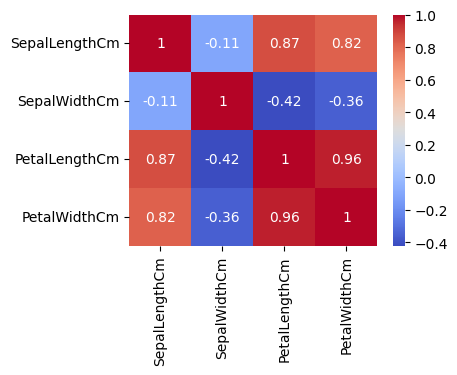

In [14]:
corr= subset_df.corr()
fig, ax= plt.subplots(figsize=(4,3))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [16]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model Training

In [17]:
from sklearn.model_selection import train_test_split
#train - 70  test - 30
x=df.drop(columns=['Species'])
y=df['Species']
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3)

In [18]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [19]:
model.fit(x_train,y_train)

LogisticRegression()

In [20]:
print('Accuracy :',model.score(x_test,y_test)*100)

Accuracy : 97.77777777777777


In [27]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()

In [28]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
print('Accuracy :', model_knn.score(x_test,y_test)*100)

Accuracy : 97.77777777777777


In [24]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [25]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
print('Accuracy :', model.score(x_test,y_test)*100)

Accuracy : 95.55555555555556


In [30]:
x_new= np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[5.3,2.5,4.6,1.9]])
prediction= model_knn.predict(x_new)
print("Prediction of species: {}".format(prediction))

Prediction of species: [0 1 2]
